In [ ]:
!pip install bertopic

In [ ]:
from bertopic import BERTopic
import pandas as pd
import numpy as np
import random as rn
import re
import nltk
import os

import matplotlib.pyplot as plt
import seaborn as sns
from plotly import graph_objs as go
import plotly.express as px
import plotly.figure_factory as ff

import pandas as pd
from wordcloud import WordCloud
import matplotlib.pyplot as plt




import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from bertopic import BERTopic
from sklearn.feature_extraction.text import CountVectorizer
from umap import UMAP
import plotly.express as px
import plotly.io as pio

In [ ]:
aljazera_2023 = pd.read_csv('aljazera_2023_predictions.csv')
aljazera_2024 = pd.read_csv('aljazera_2024_predictions.csv')
cnn_2023 = pd.read_csv('cnn_2023_predictions.csv')
cnn_2024 = pd.read_csv('cnn_2024_predictions.csv')
sky_2023 = pd.read_csv('sky_2023_predictions.csv')
sky_2024 = pd.read_csv('sky_2024_predictions.csv')

In [ ]:
sentiment_labels = {0: 'Pro Israel', 1: 'Pro Palestine', 2: 'Neutral'}
aljazera_2023['sentiment'] = aljazera_2023['sentiment'].map(sentiment_labels)
aljazera_2024['sentiment'] = aljazera_2024['sentiment'].map(sentiment_labels)
cnn_2023['sentiment'] = cnn_2023['sentiment'].map(sentiment_labels)
cnn_2024['sentiment'] = cnn_2024['sentiment'].map(sentiment_labels)
sky_2023['sentiment'] = sky_2023['sentiment'].map(sentiment_labels)
sky_2024['sentiment'] = sky_2024['sentiment'].map(sentiment_labels)

In [ ]:
merged_df = pd.concat([aljazera_2023, aljazera_2024, cnn_2023, cnn_2024, sky_2023, sky_2024], axis = 0)

In [ ]:
merged_df.head(10)

,text,likes,replies,date,sentiment
0,israeli media hides his own casualties don tel...,0,0,2023-11-07T15:56:20Z,Pro Israel
1,complaining doesn ' t change a thing only taki...,0,0,2023-10-15T10:20:41Z,Neutral
2,nothing is a waste of time if you use the expe...,0,0,2023-10-15T08:05:47Z,Neutral
3,this is crazy yes ham needs to be punished but...,0,0,2023-10-13T21:59:33Z,Pro Israel
4,this is genocide !,0,0,2023-10-13T17:46:10Z,Pro Palestine
5,gaza welcome demonic hamas and now wants sympa...,0,0,2023-10-13T02:31:23Z,Pro Israel
6,no sympathy for terrorists or those who harbor...,0,0,2023-10-13T02:22:56Z,Pro Israel
7,i don ’ t understand i ’ m very surprised at p...,1,0,2023-10-13T00:23:40Z,Pro Israel
8,why the ham at them first . . ? [ un ##k ],0,0,2023-10-12T20:51:53Z,Pro Israel
9,el sol sera dad con fu a que a los ho . dia fi...,0,0,2023-10-12T18:19:06Z,Pro Israel


## Word Cloude of the entire dataset

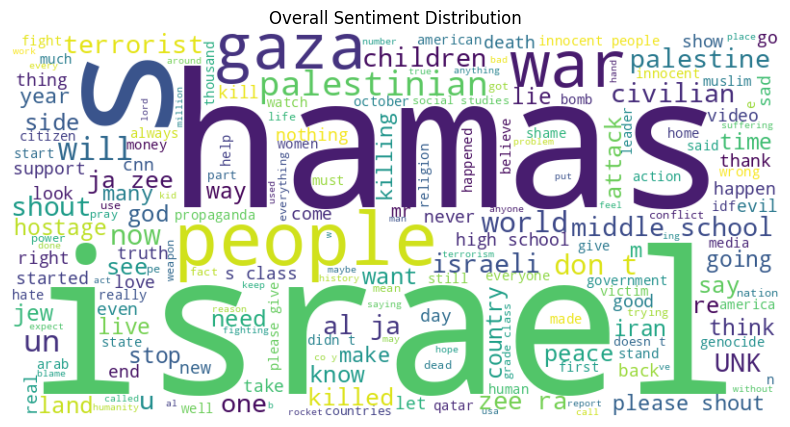

In [ ]:
df = merged_df.copy()
df = df.dropna(subset=['text'])


df['text'] = df['text'].astype(str)

# Combine all text into a single string
all_text = ' '.join(df['text'])

# Function to generate a word cloud
def generate_wordcloud(text):
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.title('Overall Sentiment Distribution')
    plt.axis('off')
    plt.show()

# Generate and display the word cloud
generate_wordcloud(all_text)

## Topic modelling of the entire dataset

In [ ]:
def bert_topic_model():

  umap_model = UMAP(
    n_neighbors=15,
    n_components=5,
    min_dist=0.0,
    metric='cosine',
    random_state=42)


  vectorizer_model = CountVectorizer(stop_words="english", max_df=0.95, min_df=2)

  # Create BERTopic model
  topic_model = BERTopic(
    umap_model=umap_model,
    vectorizer_model=vectorizer_model,
    nr_topics='auto',  # Automatically determine optimal number of topics
    top_n_words=10,    # Top 10 words per topic
    calculate_probabilities=True,
    verbose=True
  )
  return topic_model


In [ ]:
merged_df_topics = bert_topic_model()

In [ ]:
# Fit the model
topics, probs = merged_df_topics.fit_transform(df['text'].tolist())

2025-03-15 19:45:35,595 - BERTopic - Embedding - Transforming documents to embeddings.


Batches:   0%|          | 0/415 [00:00<?, ?it/s]

2025-03-15 19:45:56,073 - BERTopic - Embedding - Completed ✓
2025-03-15 19:45:56,075 - BERTopic - Dimensionality - Fitting the dimensionality reduction algorithm
2025-03-15 19:46:34,026 - BERTopic - Dimensionality - Completed ✓
2025-03-15 19:46:34,027 - BERTopic - Cluster - Start clustering the reduced embeddings
2025-03-15 19:47:04,310 - BERTopic - Cluster - Completed ✓
2025-03-15 19:47:04,311 - BERTopic - Representation - Extracting topics from clusters using representation models.
2025-03-15 19:47:04,785 - BERTopic - Representation - Completed ✓
2025-03-15 19:47:04,786 - BERTopic - Topic reduction - Reducing number of topics
2025-03-15 19:47:05,150 - BERTopic - Topic reduction - Reduced number of topics from 196 to 62


In [ ]:

topic_info = merged_df_topics.get_topic_info()

#Select the top 10 topics excluding the -1 (outlier/noise) topic if present
top_10_topics = topic_info[topic_info['Topic'] != -1].head(10)
print(top_10_topics)

    Topic  Count                                Name  \
1       0   5334                0_al_ja_hamas_israel   
2       1    867         1_school_shout_class_middle   
3       2    149                   2_bid_joe_iran_en   
4       3     85               3_october_oct_7th_9th   
5       4     76         4_ukraine_russia_putin_nato   
6       5     64               5_tua_surf_martins_vi   
7       6     61   6_music_movie_dramatic_background   
8       7     44   7_buildings_building_standing_air   
9       8     41  8_documentary_film_hollywood_movie   
10      9     39       9_horrible_sad_bullshit_sorry   

                                       Representation  \
1   [al, ja, hamas, israel, zee, ra, people, gaza,...   
2   [school, shout, class, middle, mr, studies, so...   
3   [bid, joe, iran, en, billion, administration, ...   
4   [october, oct, 7th, 9th, sunday, 8th, monday, ...   
5   [ukraine, russia, putin, nato, munitions, russ...   
6   [tua, surf, martins, vi, california, 

In [ ]:
#Visualize the frequencies of the top 10 topics
merged_df_topics.visualize_barchart(top_n_topics=10)

analizzando i 10 argomenti di discussione piú frequenti sull'intero dataset possiamo notare delle cose interessanti.

Il topic 0, che rappresenta l'argomento piú comune di discussione possiamo notare che sia incentrato come potevamo aspettarci sulle due fazioni rivali, hamas e Israles.

Spiccano successivamente argomenti With terms such as "school," "shout," "middle," "class," this might indicate discussions about educational or societal issues, possibly reflecting on situations or events occurring in schools or involving children in conflict zones.

Topic 2: This topic, featuring words like "bid," "joe," "iran," "billion," and "en," could be related to international relations or economic discussions, perhaps involving US policies or financial aspects concerning the Middle East.

Topic 3: With words like "October," "oct," "7th," "9th," and "Sunday," this topic appears to capture conversations related to specific dates or events, probabilmente riferendosi all'evento del 7 ottobre che ha segnato l'escalation del conflito. Appaiono anche argomenti di discussione contenenti parole come "putin", "nato", "Russia", "Ukraine", probabilmente facendo riferimenti o analogie rispetto a un altro grande conflitto che é in atto al momento in Europa.

Per concludere possiamo notare come siano comuni espressioni emotive probabilmente relativamente ai contenuti dei video o agli eventi del conflitto, con parole come "horrible", "awful", "sorry" che dimostrano un coinvolgimento emotivo da parte degli utenti rispetto alle vicende riportate.

## topic modelling for each sentiment

In [ ]:
pro_israel_df = df[df['sentiment'] == 'Pro Israel']
pro_palestine_df = df[df['sentiment'] == 'Pro Palestine']
neutral_df = df[df['sentiment'] == 'Neutral']

pro israel topic modelling

In [ ]:
#topic modelling pro israel sentiment
pro_israel_topics = bert_topic_model()

In [ ]:
# Fit the model
topics, probs = pro_israel_topics.fit_transform(pro_israel_df['text'].tolist())

2025-03-15 20:11:06,299 - BERTopic - Embedding - Transforming documents to embeddings.


Batches:   0%|          | 0/143 [00:00<?, ?it/s]

2025-03-15 20:11:10,614 - BERTopic - Embedding - Completed ✓
2025-03-15 20:11:10,615 - BERTopic - Dimensionality - Fitting the dimensionality reduction algorithm
2025-03-15 20:11:21,820 - BERTopic - Dimensionality - Completed ✓
2025-03-15 20:11:21,821 - BERTopic - Cluster - Start clustering the reduced embeddings
2025-03-15 20:11:23,175 - BERTopic - Cluster - Completed ✓
2025-03-15 20:11:23,176 - BERTopic - Representation - Extracting topics from clusters using representation models.
2025-03-15 20:11:23,359 - BERTopic - Representation - Completed ✓
2025-03-15 20:11:23,359 - BERTopic - Topic reduction - Reducing number of topics
2025-03-15 20:11:23,488 - BERTopic - Topic reduction - Reduced number of topics from 75 to 8


In [ ]:
topic_info = pro_israel_topics.get_topic_info()

# Select the top 10 topics excluding the -1 (outlier/noise) topic if present
top_10_topics = topic_info[topic_info['Topic'] != -1].head(10)
print(top_10_topics)

   Topic  Count                             Name  \
1      0   2440       0_hamas_israel_gaza_people   
2      1    161  1_shout_school_elementary_class   
3      2     99    2_hostages_don_victim_hostage   
4      3     17       3_october_8th_happened_7th   
5      4     14          4_bear_poke_fight_eaten   
6      5     12             5_haven_se_guess_saw   
7      6     12       6_stupid_games_prizes_play   

                                      Representation  \
1  [hamas, israel, gaza, people, al, ja, palestin...   
2  [shout, school, elementary, class, grade, high...   
3  [hostages, don, victim, hostage, free, war, in...   
4  [october, 8th, happened, 7th, sunday, oct, dat...   
5  [bear, poke, fight, eaten, play, don, pick, wo...   
6             [haven, se, guess, saw, won, , , , , ]   
7  [stupid, games, prizes, play, win, prize, game...   

                                 Representative_Docs  
1  [who start the war , " hamas " . who killed in...  
2  [why can you not shou

In [ ]:
# Visualize the frequencies of the top 10 topics
pro_israel_topics.visualize_barchart(top_n_topics=10)


Analizando piú nello specifico gli argomenti di discussione nei commenti pro Israele possiamo notare come il Topic 0 sia centrato attorno a parole chiave come "Hamas," "Israel," "Gaza," "people," indicando che la discussione si concentra sugli attori principali del conflitto israelo-palestinese. La presenza di termini geografici e nominativi di gruppi coinvolti suggerisce un'analisi diretta delle dinamiche politiche e sociali del conflitto.

Topic 1: Si focalizza su temi educativi o di contesto scolastico, con parole come "shout," "school," "elementary," "class," e "grade." Potrebbe riflettere discussioni su come il conflitto è percepito o insegnato nelle scuole, oppure metafore educative usate per discutere il conflitto.

Topic 2: Riguarda la narrativa di ostaggi e vittimizzazione, con termini come "hostages," "dom," "victim," "hostage," e "free." Questo suggerisce che sia molto sentito dai sostenitori della causa Israeliana la questione relativa agli ostaggi e alla loro liberazione, probabilmente riferendosi agli eventi del 7 ottobre 2023 dove i miliziani di Hamas hanno catturato numerosi ostaggi in seguito all'evento ? nome.

Topic 3: È legato a specifici eventi temporali, con termini come "October," "8th," "happened," "7th," e "Sunday." Questo implica discussioni su eventi che sono accaduti in particolari date.

Topic 5 e 6: Mostrano una miscela di termini più casuali o generici come "haven," "se," "guess," "saw," "won," e parole legate a giochi o competizioni come "stupid," "games," "prizes," "play," "win." Questi topics potrebbero riflettere come gli utenti utilizzano il gioco e la competizione come metafore per discutere il conflitto, oppure potrebbero semplicemente distogliere l'attenzione dai temi più pesanti del conflitto.

In sintesi, il grafico mostra come i commenti pro-Israele trattino una gamma di temi che vanno dal politico e storico, al personale e metaforico, con un forte focus su eventi specifici e reazioni emotive. Questo riflette la complessità del discorso intorno al conflitto dove le percezioni, le esperienze personali e la storia collettiva si intrecciano nei modi più vari.

In [ ]:
def analyze_keywords_for_one_sentiment(sentiment, model):

    topic_info = model.get_topic_info()
    significant_topics = topic_info[topic_info['Topic'] != -1].head(5)['Topic'].tolist()

    if len(significant_topics) == 0:
        print(f"no topic found for {sentiment}")
        return


    sentiment_words = {}
    for topic_id in significant_topics:
        for word, weight in model.get_topic(topic_id)[:10]:
            if word in sentiment_words:
                sentiment_words[word] = max(sentiment_words[word], weight)
            else:
                sentiment_words[word] = weight


    if sentiment_words:

        sorted_words = dict(sorted(sentiment_words.items(), key=lambda x: x[1], reverse=True)[:20])

        plt.figure(figsize=(12, 8))
        plt.barh(list(sorted_words.keys()), list(sorted_words.values()), color='blue')
        plt.title(f'Top 20 key words for {sentiment}')
        plt.xlabel('weight')
        plt.ylabel('word')
        plt.gca().invert_yaxis()
        plt.savefig(f'keywords_{sentiment.replace(" ", "_")}.png', dpi=300)
        plt.show()


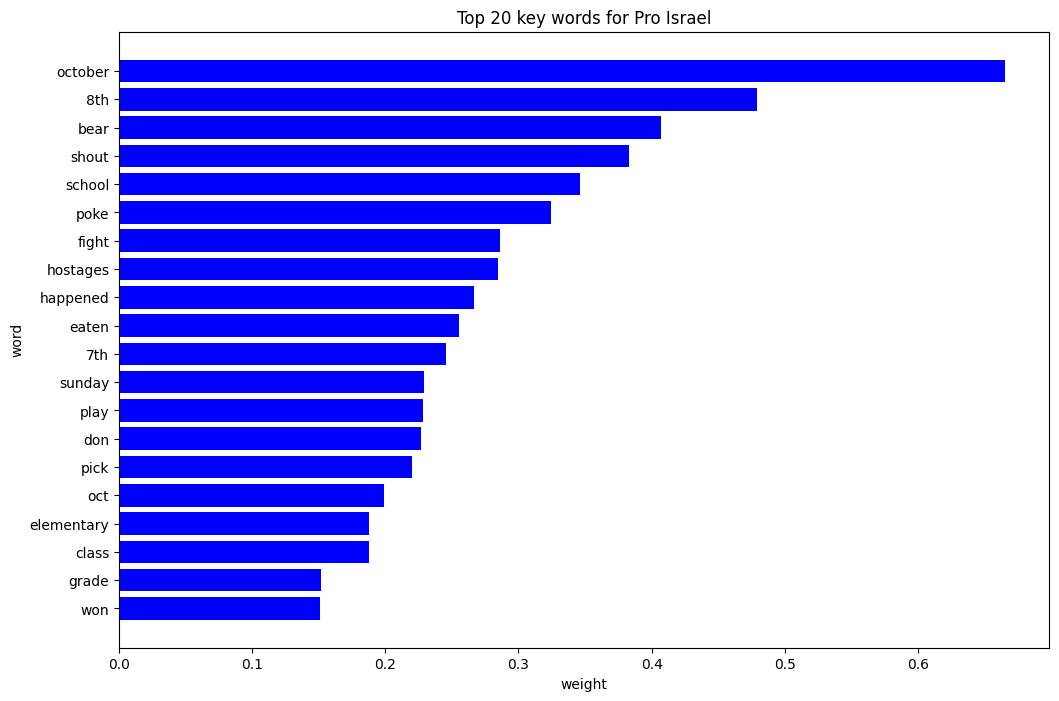

In [ ]:
analyze_keywords_for_one_sentiment('Pro Israel', pro_israel_topics)

Analizzando invece le parole piú frequenti nei commenti che sostengono la causa israeliana possiamo confermare pressapoco quanto affermato in precedenza. Le parole con maggiore peso, come "October", "8th", e "bear", indicano un'accentuata discussione su eventi specifici, forse riferendosi a date significative o eventi accaduti durante il mese di ottobre. L'uso di parole come "shout" e "fight" suggerisce un tono di confronto o di azione diretta, mentre termini come "hostages" e "eaten" potrebbero riflettere le narrative di conflitto e le percezioni di aggressione o vittimizzazione.

Le parole "school", "elementary", e "class" si evidenziano ancora una volta, suggerendo che le discussioni possono anche toccare gli impatti del conflitto sulla vita quotidiana, in particolare l'educazione dei giovani.

In sintesi, il grafico mostra una miscela di terminologia che riflette l'intensità delle discussioni, con una combinazione di riferimenti diretti al conflitto, eventi specifici e temi educativi. Questa varietà di parole chiave suggerisce che, pur essendo prevalentemente focalizzati sul sostegno a Israele, i commentatori pro-Israele integrano nei loro messaggi una gamma di considerazioni che spaziano dall'educativo al contestualmente specifico e emotivamente carico.

DA CANCELLARE IL SUCCESSIVO

Analizzando le parole più comuni nei commenti pro israele possiamo notare l'elevata frequenza di termini di emozione e impatto: Parole come "stupid" e "fuck" dominano il grafico, indicando un alto livello di carica emotiva e un uso frequente di linguaggio forte o volgare nei commenti. Notiamo anche una grande presenza di verbi e azioni: "won," "gives," e "play," implicano azione o risultato. Questo suggerisce che i commenti spesso discutono di risultati, azioni o suggeriscono un'attività legata al conflitto, possibilmente riferendosi a vittorie, perdite, e strategie.

Aspetti quotidiani e sociali: Parole come "school" e "life" indicano che le discussioni spesso toccano temi legati agli impatti del conflitto sulla vita quotidiana e sull'educazione. Mentre parole come "games", "prizes" e "play" potrebbero indicare una tendenza a metaforizzare il conflitto come un gioco o una competizione.

## pro palestine topic modelling

In [ ]:
pro_palestine_topics = bert_topic_model()

In [ ]:
# Fit the model
topics, probs = pro_palestine_topics.fit_transform(pro_palestine_df['text'].tolist())

2025-03-15 20:01:00,181 - BERTopic - Embedding - Transforming documents to embeddings.


Batches:   0%|          | 0/102 [00:00<?, ?it/s]

2025-03-15 20:01:06,111 - BERTopic - Embedding - Completed ✓
2025-03-15 20:01:06,114 - BERTopic - Dimensionality - Fitting the dimensionality reduction algorithm
2025-03-15 20:01:31,875 - BERTopic - Dimensionality - Completed ✓
2025-03-15 20:01:31,877 - BERTopic - Cluster - Start clustering the reduced embeddings
2025-03-15 20:01:32,540 - BERTopic - Cluster - Completed ✓
2025-03-15 20:01:32,542 - BERTopic - Representation - Extracting topics from clusters using representation models.
2025-03-15 20:01:32,685 - BERTopic - Representation - Completed ✓
2025-03-15 20:01:32,686 - BERTopic - Topic reduction - Reducing number of topics
2025-03-15 20:01:32,780 - BERTopic - Topic reduction - Reduced number of topics from 56 to 11


In [ ]:
topic_info = pro_palestine_topics.get_topic_info()

# Select the top 10 topics excluding the -1 (outlier/noise) topic if present
top_10_topics = topic_info[topic_info['Topic'] != -1].head(10)
print(top_10_topics)

    Topic  Count                                 Name  \
1       0   1652       0_israel_gaza_people_palestine   
2       1    117            1_shout_school_middle_mrs   
3       2     65          2_tua_martins_california_vi   
4       3     34                 3_liar_unk_real_tine   
5       4     29              4_jesus_christ_god_come   
6       5     17              5_az_campus_scribe_main   
7       6     15    6_war_crimes_deception_aggression   
8       7     15                     7_ila_ss_pl_love   
9       8     12             8_nazis_evil_nazi_hitler   
10      9     12  9_refugees_refugee_europe_countries   

                                       Representation  \
1   [israel, gaza, people, palestine, unk, free, c...   
2   [shout, school, middle, mrs, class, mot, india...   
3   [tua, martins, california, vi, grade, mr, 7th,...   
4   [liar, unk, real, tine, les, las, ber, pure, s...   
5   [jesus, christ, god, come, kingdom, john, toda...   
6   [az, campus, scribe, main,

In [ ]:
# Visualize the frequencies of the top 10 topics
pro_palestine_topics.visualize_barchart(top_n_topics=10)

Analizzando i commenti pro palestina possiamo notare che Mentre i commenti pro-Israele erano focalizzati su argomenti di conflitto, vittoria, e discussioni dirette sugli eventi, i commenti pro-Palestina sembrano toccare temi più vari e complessi che includono anche aspetti storici, educativi e umanitari.

Topic 0 e Topic 1: Simili ai commenti pro-Israele, questi topic includono parole legate a "Israel," "Gaza," "people," e "Palestine," indicando una discussione diretta sul conflitto.

Nel Topic 3 con parole come "liar," "unk," "real," "tine," e "les" suggeriscono una discussione sulla veridicità e l'autenticità delle informazioni, probabilmente i sostenitori della causa palestinese non si trovano d'accordo con i fatti narrati e mettono in dubbio la veridicitá delle informazioni diffuse o l'affidabilitá dei canali d'informazione.

Nei successivi argomenti di discussione é interessante notare come siano presenti tematiche religiose ("Jesus," "Christ," "God") e concetti di amore e pace ("love"), che potrebbero essere indicazione del fatto che alcuni utenti, indipendentemente dalla propria religione, esprimano sentimenti di vicinanza e amore nei confronti del popolo palestinese.

Per concludere nel topic numero 8 possiamo notare come le parole "nazis", "hitler", "holocaust" vengano usate dai sostenitori della causa palestinese probabilmente per descrivere le azioni della controparte paragonandole con fatti molto gravi al pari di quelli avvenuti durante il secondo conflitto mondiale.

DA CANCELLARE

L'analisi del topic modeling sui commenti pro-Palestina evidenzia una varietà di discussioni che contrastano in parte con quelle osservate nei commenti pro-Israele. Mentre nei commenti pro-Israele prevalgono temi legati direttamente al conflitto, agli attori principali come Hamas e alla popolazione di Gaza, con un linguaggio che spesso trasuda aggressività e supporto per la causa israeliana, l'analisi dei commenti pro-Palestina offre una panoramica leggermente diversa.

il Topic 0: Concentrato su "Israel," "Palestine," e "Gaza," si sovrappone in tema con i commenti pro-Israele, indicando che i commentatori discutono intensamente gli stessi argomenti geopolitici, ma presumibilmente da prospettive opposte.
Nel Topic 1 invecem, termini come "shout," "school," e "middle," suggerendo discussioni che potrebbero riguardare l'educazione o le conseguenze sociali del conflitto. La parola "Liar" nel topic 3 potrebbe ivece denotare un sentimento di diffidenza verso per esempio al canale di informazione che sta presentando le informazioni oppure rispetto ai fatti narrati, che secondo i sostenitori della causa palestinese, non sono veritieri. Interessante poi notare come nei Topic 3 e 4 sono presenti tematiche religiose ("Jesus," "Christ," "God") e concetti di amore e pace ("love"), che potrebbero essere indicazione del fatto che alcuni utenti, indipendentemente dalla propria religione, esprimano sentimenti di vicinanza, amore nei confronti del popolo palestinese. Notiamo perciò una tendenza opposta ai commenti pro Israele che invece come abbiamo potuto notare erano caratterizzati da un linguaggio più scurrile e di offesa alla controparte, cosa che dal punto di vista degli utenti pro palestina non si è verificata

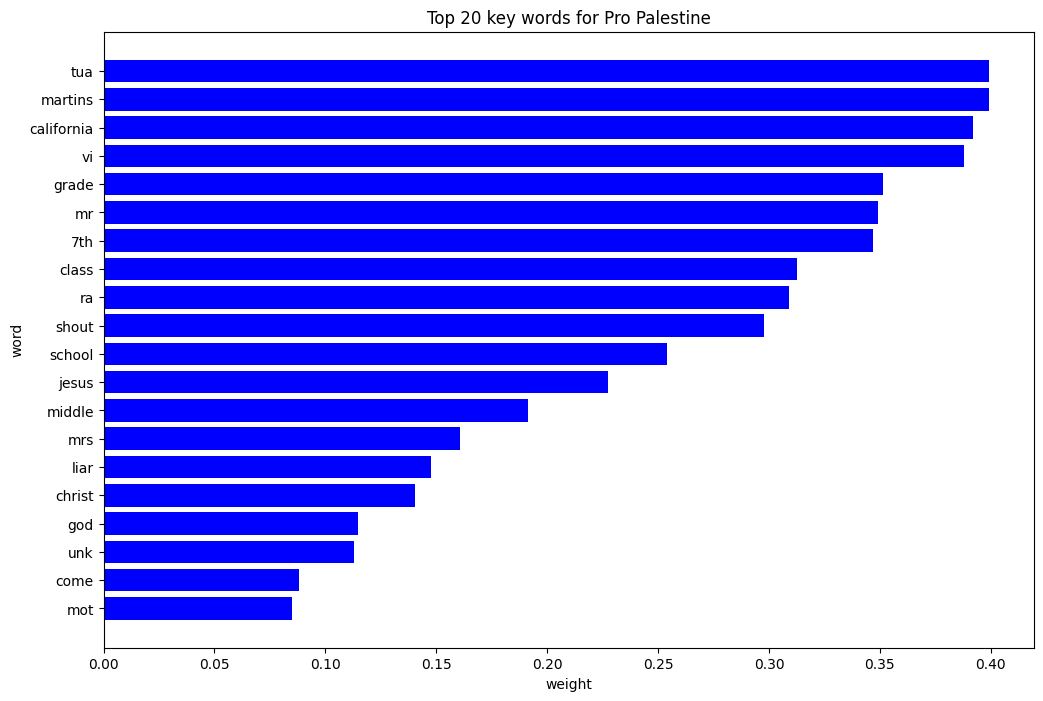

In [ ]:
analyze_keywords_for_one_sentiment('Pro Palestine', pro_palestine_topics)

Nel caso delle parole più frequenti nei commenti pro palestina, possiamo notare che non forniscono ulteriori informazioni rispetto a quanto precedentemente rilevato, ma confermando in un certo senso le tendenze sopra individuate.

neutral comments topic modelling

In [ ]:
neutral_topics = bert_topic_model()

In [ ]:
# Fit the model
topics, probs = neutral_topics.fit_transform(neutral_df['text'].tolist())

2025-03-15 20:01:33,818 - BERTopic - Embedding - Transforming documents to embeddings.


Batches:   0%|          | 0/171 [00:00<?, ?it/s]

2025-03-15 20:01:37,490 - BERTopic - Embedding - Completed ✓
2025-03-15 20:01:37,491 - BERTopic - Dimensionality - Fitting the dimensionality reduction algorithm
2025-03-15 20:01:51,325 - BERTopic - Dimensionality - Completed ✓
2025-03-15 20:01:51,327 - BERTopic - Cluster - Start clustering the reduced embeddings
2025-03-15 20:01:54,444 - BERTopic - Cluster - Completed ✓
2025-03-15 20:01:54,448 - BERTopic - Representation - Extracting topics from clusters using representation models.
2025-03-15 20:01:54,746 - BERTopic - Representation - Completed ✓
2025-03-15 20:01:54,749 - BERTopic - Topic reduction - Reducing number of topics
2025-03-15 20:01:54,992 - BERTopic - Topic reduction - Reduced number of topics from 102 to 49


In [ ]:
topic_info = neutral_topics.get_topic_info()

# Select the top 10 topics excluding the -1 (outlier/noise) topic if present
top_10_topics = topic_info[topic_info['Topic'] != -1].head(10)
print(top_10_topics)

    Topic  Count                               Name  \
1       0   1339                  0_al_israel_ja_ra   
2       1    658           1_school_middle_class_mr   
3       2    185       2_cnn_news_documentary_video   
4       3     69    3_music_festival_dramatic_movie   
5       4     69              4_october_oct_7th_9th   
6       5     58       5_children_kids_heart_killed   
7       6     54        6_ukraine_russia_putin_nato   
8       7     51              7_sad_sorry_load_sham   
9       8     47        8_bid_administration_joe_en   
10      9     46  9_asked_started_blame_responsible   

                                       Representation  \
1   [al, israel, ja, ra, zee, war, iran, israeli, ...   
2   [school, middle, class, mr, shout, studies, so...   
3   [cnn, news, documentary, video, propaganda, fi...   
4   [music, festival, dramatic, movie, background,...   
5   [october, oct, 7th, 9th, sunday, 1948, 70, 8th...   
6   [children, kids, heart, killed, innocent, babi..

In [ ]:
# Visualize the frequencies of the top 10 topics
neutral_topics.visualize_barchart(top_n_topics=10)

Prendendo invece in considerazione gli argomenti di discussione dei commenti classificati come neutrali possiamo notare innanzi tutto una tendenza a discutere dei network di informazione, le abbreviazioni 'al', 'ja', 'zee' sembrano suggerire discussioni riguardanti aljazeera, la stessa cosa per 'cnn', 'news', 'propaganda', confermando la presenza da parte degli utenti di pareri contrastanti rispetto alle informazioni diffuse su Youtube. Molto probabilmente infatti, alcuni network vengono reputati come faziosi e di non presentare informazioni in maniera parziale, oppure presentando fatti ritenuti non veritieri.

Topic 4 e 5: Temi legati al tempo e alla famiglia o alle vittime del conflitto. Le date in Topic 4 possono riferirsi a eventi specifici, mentre le parole come "children," "kids," "heart," "killed," e "innocent" in Topic 5 sottolineano la discussione sulle conseguenze umane del conflitto.

Parole come "sad," "sorry," "load," "sham," e "mm." invece rivelano una risposta emotiva al conflitto o alle sue rappresentazioni, mostrando compassione o disappunto.

A differenza dei commenti pro Israele e pro Palestina, i commenti neutrali tendono a mostrare un'ampia varietà di prospettive che non si limitano a sostenere una causa specifica. Invece, esplorano le implicazioni più ampie del conflitto, il ruolo dei media, l'impacto culturale, e mostrano una sensibilità per le vittime e le conseguenze umane del conflitto. Questo indica un approccio più olistico e riflessivo nei confronti del conflitto, evidenziando un interesse per le cause profonde

da cancellare

Per quanto concerne i commenti di carattere neutrale possiamo notare come gli argomenti di discussione principali come potevamo aspettarci riguardano le dinamiche del conflitto con parole come "war", "shout" e la presenza di molte date probabilmente usate per descrivere passati avvenimenti. parole come "festival", "music" potrebbero indicare discussioni riguardanti l'avvenimento del 7 ottobre in corrispondenda di un festival musicale. Nel topic 7 parole come "fake" "news" potrebbero essere indicative di uno scetticismo nei confronti dei canali di informazione, dimostrandosi come argomento di discussione molto sentito. Queste considerazioni sono in linea con quanto possiamo identificare analizzando le top 20 parole chiave in questa classe di commenti.

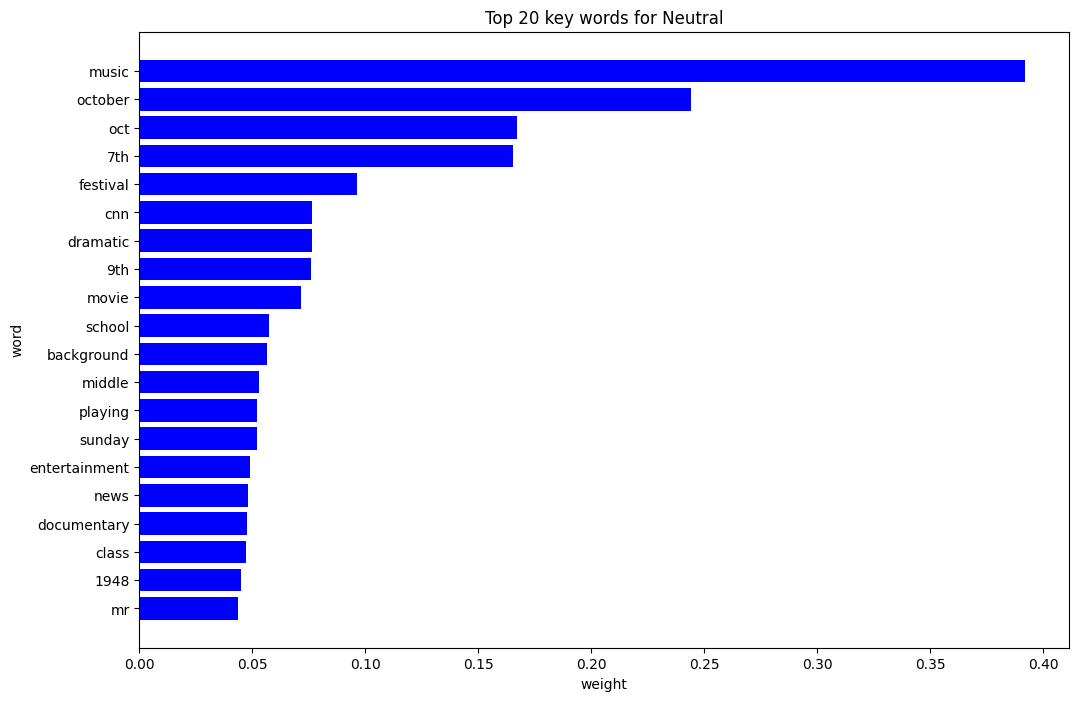

In [ ]:
analyze_keywords_for_one_sentiment('Neutral', neutral_topics)

Come precedentemente evidenziato, le parole piú frequenti confermano quanto detto e confermano il trend per il quale i commenti neutrali tendono a concentrarsi su una riflessione più ampia e meno polarizzata del conflitto, considerando la storia, l'educazione, i media e la cultura come elementi centrali per comprendere e discutere il contesto Israelo Palestinese.


Per concludere: GUARDA SE METTERLO QUI O IN CONCLUSIONI FINALI

L'analisi complessiva dei topic modellati dai commenti su YouTube legati al conflitto Israelo-Palestinese mostra distinte narrazioni nei commenti categorizzati come pro-Israele, pro-Palestina, e neutrali, riflettendo la complessità e la varietà delle prospettive e delle reazioni degli utenti.

Commenti Pro-Israele: La discussione in questa categoria si focalizza sugli attori principali del conflitto, con una frequente menzione di Hamas, Gaza e Israele, indicando una discussione diretta sulle dinamiche politiche e sociali. Si notano anche temi di ostaggi e vittimizzazione, che mostrano una preoccupazione per la sicurezza e per le azioni di guerra, oltre a discussioni legate a specifici eventi temporali che hanno segnato momenti di tensione.

Commenti Pro-Palestina: Nei commenti pro-Palestina emergono temi che includono la storia e gli aspetti umanitari del conflitto, con una forte presenza di componenti religiose e di discussioni su giustizia e diritti umani. Le parole chiave come "Jesus," "Nazis," e "holocaust" indicano la tendenza a collegare la situazione palestinese a contesti storici di oppressione.

Commenti Neutrali: Mostrano un'ampia gamma di temi che vanno oltre il conflitto diretto, con discussioni su media, educazione e cultura. Parole come "school," "CNN," e "documentary" suggeriscono un dibattito su come il conflitto è rappresentato e percepito, mentre le date e le menzioni di eventi specifici evidenziano la sensibilità verso il contesto temporale degli eventi.

In conclusione, l'analisi dei topic mostra come i vari gruppi di commentatori utilizzino YouTube come piattaforma per esprimere non solo opinioni dirette sul conflitto, ma anche per riflettere su questioni più ampie come la storia, i diritti umani, l'educazione e l'impatto dei media. Le differenze tra i gruppi di commenti sottolineano l'esistenza di una narrativa complessa e stratificata che va oltre la semplice dicotomia pro-Israele o pro-Palestina, includendo una varietà di prospettive che riflettono la profondità e la complessità del discorso pubblico su questi temi.